<a href="https://colab.research.google.com/github/royinzaghi72/Kecerdasan-Buatan/blob/main/image_fundamental.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [313]:

!wget https://riset.informatika.umm.ac.id/aguseko/opencv_logo.png --no-check-certificate

--2021-11-09 07:47:16--  https://riset.informatika.umm.ac.id/aguseko/opencv_logo.png
Resolving riset.informatika.umm.ac.id (riset.informatika.umm.ac.id)... 202.52.52.30
Connecting to riset.informatika.umm.ac.id (riset.informatika.umm.ac.id)|202.52.52.30|:443... connected.
  Unable to locally verify the issuer's authority.
HTTP request sent, awaiting response... 200 OK
Length: 91541 (89K) [image/png]
Saving to: ‘opencv_logo.png.13’

opencv_logo.png.13  100%[===================>]  89.40K   373KB/s    in 0.2s    

2021-11-09 07:47:18 (373 KB/s) - ‘opencv_logo.png.13’ saved [91541/91541]



In [314]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [315]:
import cv2
from google.colab.patches import cv2_imshow


In [316]:
# membaca image
im_path = "/content/drive/My Drive/Kecerdasan Buatan/Image Fundamental/"
image = cv2.imread(im_path + "Nangka 051.png")
image_split = cv2.imread(im_path + "final_product.png")

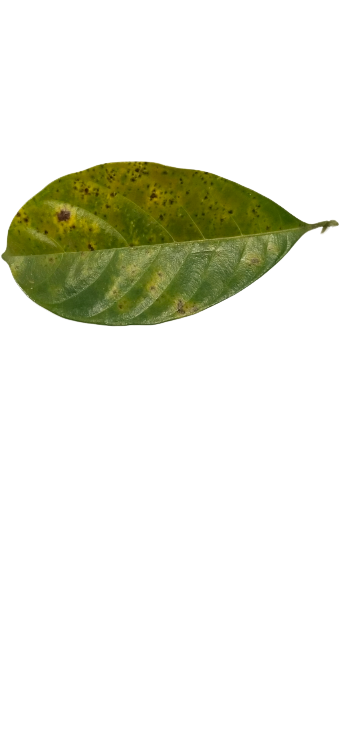

In [317]:
# menampilkan image
cv2_imshow(image)

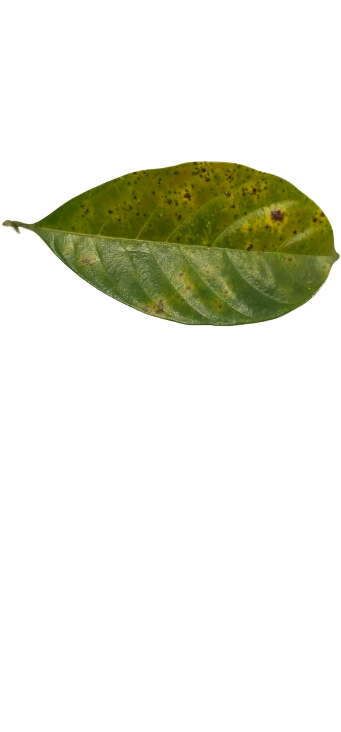

In [318]:
imageflip = cv2.flip(image,1)
cv2_imshow(imageflip)

In [319]:
# mendapatkan dimensi image
print(image.shape)

(732, 341, 3)


In [320]:
# mengakses nilai di pixel x=100, y=20
(b, g, r) = image[20, 100]
print("blue = ",b)
print("green = ",g)
print("red = ",r)

blue =  255
green =  255
red =  255


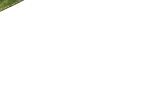

(100, 141, 3)


In [321]:
# crop image
im_crop = image[300:400, 200:350]
cv2_imshow(im_crop)
print(im_crop.shape)

In [322]:
# mengcopy image
cp_image = image.copy()
print(cp_image.shape)

(732, 341, 3)


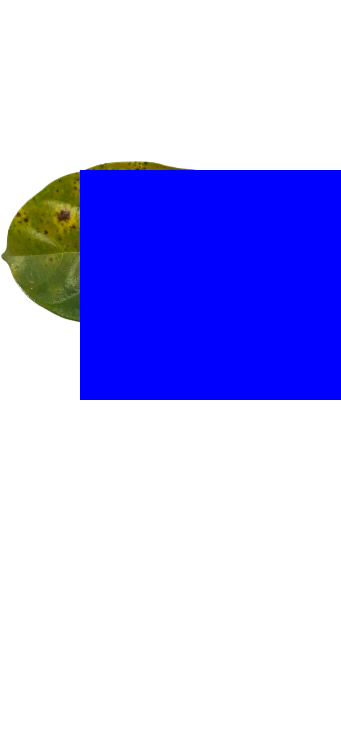

In [323]:
cp_image[170:400, 80:600] = (255, 0, 0)

cv2_imshow(cp_image)

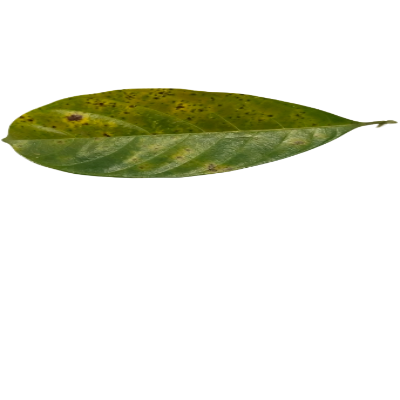

In [324]:
# resize image (ignore aspect ratio)
im_resized = cv2.resize(image, (400,400))
cv2_imshow(im_resized)

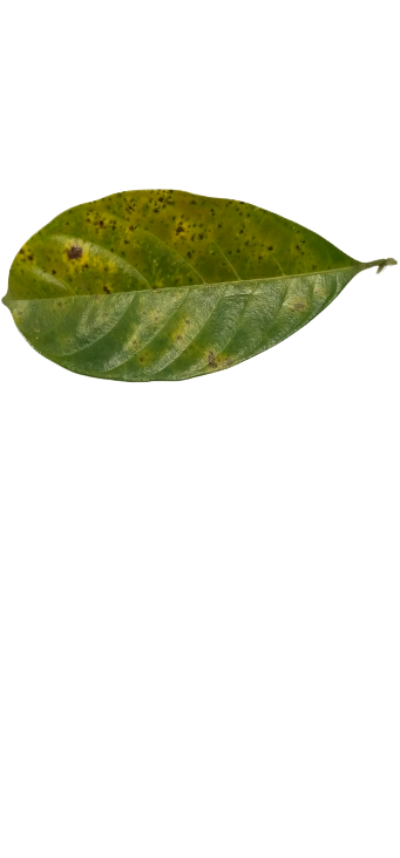

In [325]:
# resize image (mempertahankan aspect ratio)
r = 400/image.shape[1]
dim = (400,int(image.shape[0]*r))
im_resized = cv2.resize(image, dim)
cv2_imshow(im_resized)

In [326]:
im_resized.shape

(858, 400, 3)

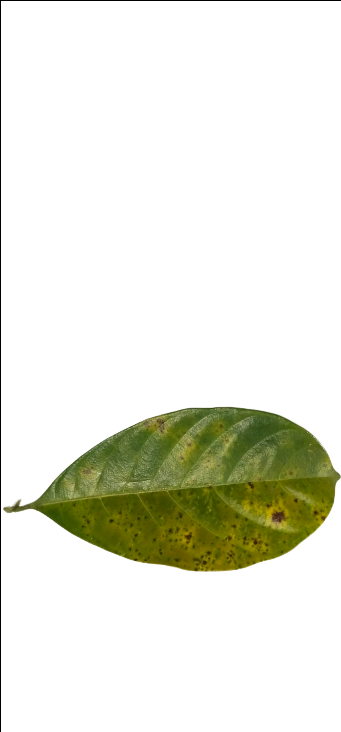

In [327]:
# Rotating an image
(h, w) = image.shape[:2]
center = (w/2, h/2)

M = cv2.getRotationMatrix2D(center, 180, 1.0)
rotated = cv2.warpAffine(image, M, (w,h))
cv2_imshow(rotated)

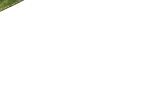

True

In [328]:
# menyimpan image
cv2_imshow(im_crop)
cv2.imwrite("daun.png", im_crop)

**MASKING**

In [329]:
from matplotlib import pyplot as plt
import argparse
import numpy as np

In [330]:
def plt_imshow(title, image):
	# convert the image frame BGR to RGB color space and display it
	image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
	plt.imshow(image)
	plt.title(title)
	plt.grid(False)
	plt.show()

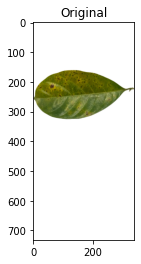

In [331]:
plt_imshow("Original", image)

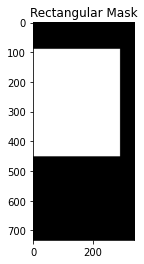

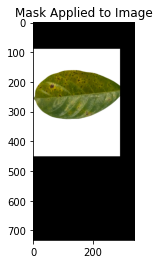

In [332]:

# a mask is the same size as our image, but has only two pixel
# values, 0 and 255 -- pixels with a value of 0 (background) are
# ignored in the original image while mask pixels with a value of
# 255 (foreground) are allowed to be kept
mask = np.zeros(image.shape[:2], dtype="uint8")
cv2.rectangle(mask, (0, 90), (290, 450), 255, -1)
plt_imshow("Rectangular Mask", mask)

# apply our mask -- notice how only the person in the image is
# cropped out
masked = cv2.bitwise_and(image, image, mask=mask)
plt_imshow("Mask Applied to Image", masked)

**SPLIT** **AND** **MERGE**

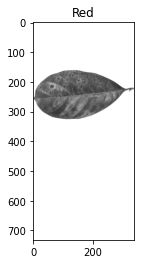

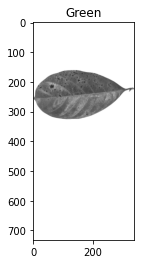

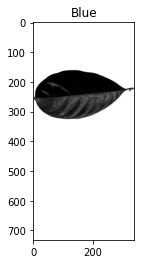

In [333]:
(B, G, R) = cv2.split(image)

# show each channel individually
plt_imshow("Red", R)
plt_imshow("Green", G)
plt_imshow("Blue", B)

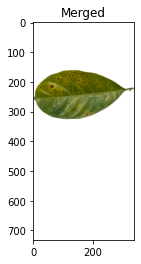

In [334]:
merged = cv2.merge([B, G, R])
plt_imshow("Merged", merged)

**USE PIL LIBRARY**

In [335]:

from PIL import Image

In [336]:
img = Image.open(im_path + "Sirih 001.jpg")
img = img.convert("RGBA")
data = img.getdata()

In [337]:
newData = []
for item in data:
    if item[0] >= 200 and item[1] >= 200 and item [2] >= 200:
        newData.append((255, 255, 255, 0))
    else:
        newData.append(item)
        
img.putdata(newData)
img.save("img.png", "PNG")

**Color Transfer**

In [338]:

def im_resize(image):
  r = 300/image.shape[1]
  dim = (300,int(image.shape[0]*r))
  im_resized = cv2.resize(image, dim)
  return (im_resized)

In [339]:
def image_stats(image):
  # compute the mean and standard deviation of each channel
  (l, a, b) = cv2.split(image)
  (lMean, lStd) = (l.mean(), l.std())
  (aMean, aStd) = (a.mean(), a.std())
  (bMean, bStd) = (b.mean(), b.std())
  
  # return the color statistics
  return (lMean, lStd, aMean, aStd, bMean, bStd)

In [340]:

def color_transfer(source, target):
  source = cv2.cvtColor(source, cv2.COLOR_BGR2LAB).astype("float32")
  target = cv2.cvtColor(target, cv2.COLOR_BGR2LAB).astype("float32")
  
  # compute color statistics for the source and target images
  (lMeanSrc, lStdSrc, aMeanSrc, aStdSrc, bMeanSrc, bStdSrc) = image_stats(source)
  (lMeanTar, lStdTar, aMeanTar, aStdTar, bMeanTar, bStdTar) = image_stats(target)
  
  # subtract the means from the target image
  (l, a, b) = cv2.split(target)
  l -= lMeanTar
  a -= aMeanTar
  b -= bMeanTar
  
  # scale by the standard deviations
  l = (lStdTar / lStdSrc) * l
  a = (aStdTar / aStdSrc) * a
  b = (bStdTar / bStdSrc) * b
  
  # add in the source mean
  l += lMeanSrc
  a += aMeanSrc
  b += bMeanSrc
  
  # clip the pixel intensities to [0, 255] if they fall outside this range
  l = np.clip(l, 0, 255)
  a = np.clip(a, 0, 255)
  b = np.clip(b, 0, 255)
  
  # merge the channels together and convert back to the RGB color
  # space, being sure to utilize the 8-bit unsigned integer data type
  transfer = cv2.merge([l, a, b])
  transfer = cv2.cvtColor(transfer.astype("uint8"), cv2.COLOR_LAB2BGR)
  
  # return the color transferred image
  return transfer

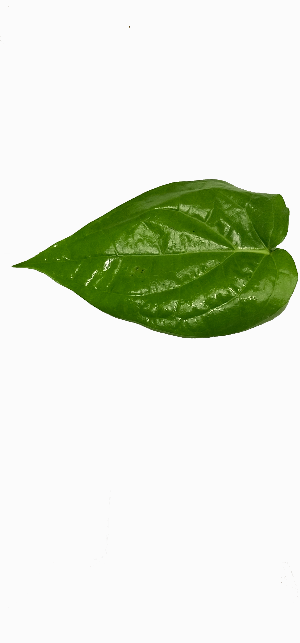

sirih


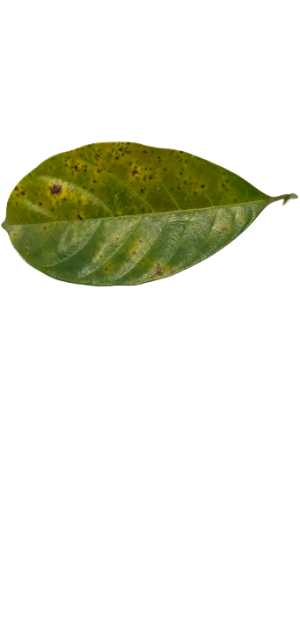

nangka


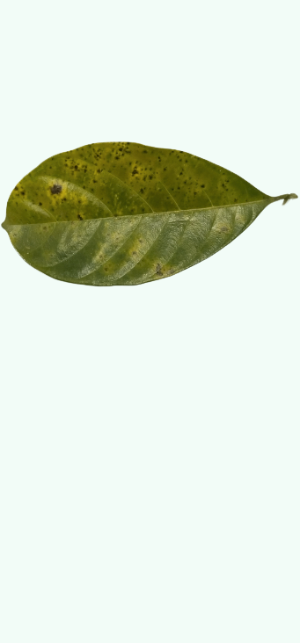

Color Transfered sirih to nangka


In [341]:
source = cv2.imread(im_path + "Sirih 001.png")
target = cv2.imread(im_path + "Nangka 051.png")

transfer = color_transfer(source, target)

nangka = im_resize(target)
sirih = im_resize(source)
trans = im_resize(transfer)
cv2_imshow(sirih)
print("sirih")
cv2_imshow(nangka)
print("nangka")
cv2_imshow(trans)
print("Color Transfered sirih to nangka")